### Exploración de Datos

Vamos a explorar los datos que usaremos en el proyecto 13.

In [34]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargamos los datos
dataset = load_dataset("cnn_dailymail", "3.0.0")

print(dataset)

Generating test split: 100%|██████████| 11490/11490 [00:00<00:00, 142330.54 examples/s]


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [6]:
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

In [26]:
# Los convertimos en dataframes en pandas
train_df = pd.DataFrame(train_data)
validation_data_df = pd.DataFrame(validation_data)
test_data_df =  pd.DataFrame(test_data)

In [27]:
train_df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [28]:
validation_data_df.head()

,article,highlights,id
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...,a4942dd663020ca54575471657a0af38d82897d6
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...,4157bc4da185971e2742f349d69a037343bc0d95
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...,60736693e3b1b32d14337a317190c6606e879a85
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...,8cdf9cc3ed0276b7a7944cc18ba459355b5984ad
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ...",2e6613d531843515bf5401286cc3e45c4df530d2


In [29]:
test_data_df.head()

,article,highlights,id
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f


In [30]:
train_df.describe()

,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,"SHANGHAI, China (CNN) -- If it weren't for th...",This page includes the show Transcript and the...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
freq,3,83,1


In [36]:
train_df['article_length'] = train_df['article'].apply(len)
train_df['highlights_length'] = train_df['highlights'].apply(len)

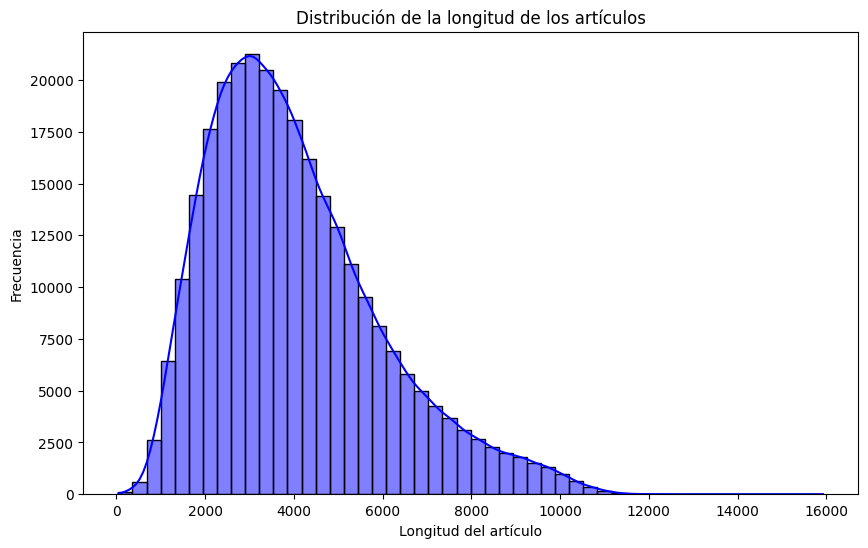

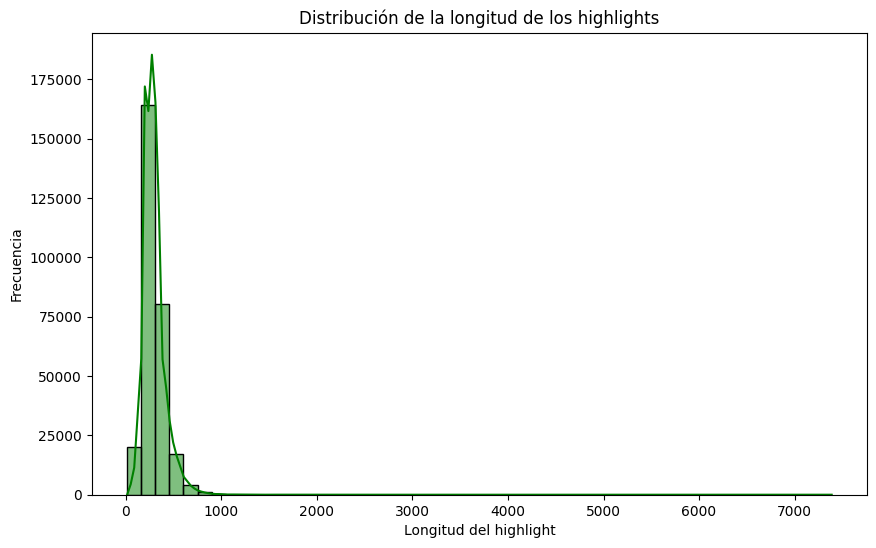

In [37]:
# Histograma de la longitud de los artículos
plt.figure(figsize=(10, 6))
sns.histplot(train_df['article_length'] , bins=50, kde=True, color='blue')
plt.title('Distribución de la longitud de los artículos')
plt.xlabel('Longitud del artículo')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la longitud de los highlights
plt.figure(figsize=(10, 6))
sns.histplot(train_df['highlights_length'], bins=50, kde=True, color='green')
plt.title('Distribución de la longitud de los highlights')
plt.xlabel('Longitud del highlight')
plt.ylabel('Frecuencia')
plt.show()

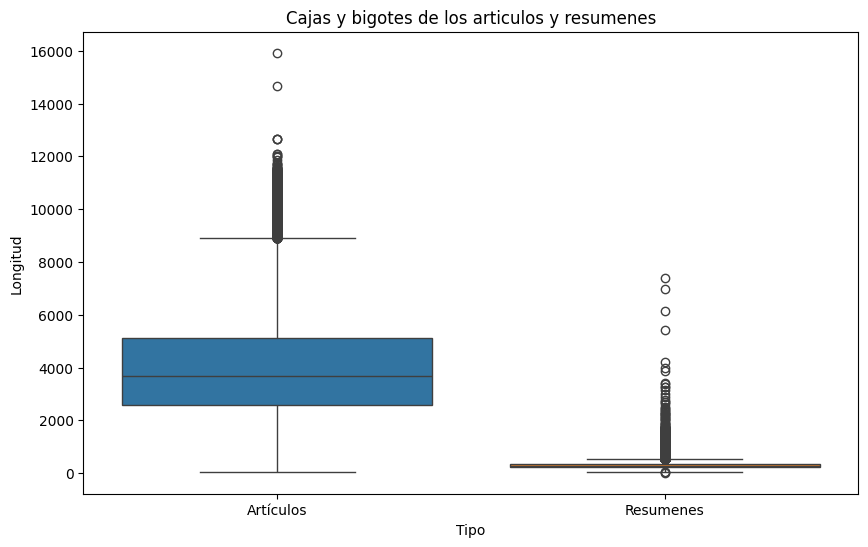

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[['article_length', 'highlights_length']])
plt.title('Cajas y bigotes de los articulos y resumenes')
plt.ylabel('Longitud')
plt.xlabel('Tipo')
plt.xticks([0, 1], ['Artículos', 'Resumenes'])
plt.show()

In [ ]:
def calcular_skew(train_df, validation_data_df, test_data_df):
    print("Sesgo de la longitud resumenes:")
    print(f"Train: {train_df['highlights'].apply(len).skew()}")
    print(f"Validation: {validation_data_df['highlights'].apply(len).skew()}")
    print(f"Test: {test_data_df['highlights'].apply(len).skew()}")
    
    print("\nSesgo de la longitud articulos:")
    print(f"Train: {train_df['article'].apply(len).skew()}")
    print(f"Validation: {validation_data_df['article'].apply(len).skew()}")
    print(f"Test: {test_data_df['article'].apply(len).skew()}")

calcular_skew(train_df, validation_data_df, test_data_df)

Sesgo de la longitud resumenes:
Train: 4.562307773307188
Validation: 14.719870456674828
Test: 4.6961662042607175

Sesgo de la longitud articulos:
Train: 0.8736878647415133
Validation: 0.892931794203539
Test: 0.9105421153741248


In [48]:
top_3_highlights = validation_data_df.nlargest(3, 'highlights_length')
print(top_3_highlights)

                                                 article  ... highlights_length
11530  He was the despised ‘crookback’ king of Tudor ...  ...              8541
4496   Champions League holders Real Madrid will face...  ...              3264
12052  Positive message: The Chancellor, pictured tod...  ...              2090

[3 rows x 5 columns]


In [58]:
print(top_3_highlights["highlights"].iloc[0])

Five day celebration for the last English king to fall in battle begins today .
Final journey begins at Bosworth Field and ends at Leicester Cathedral .
Richard will be buried on Thursday after he's attended by living relatives .
DNA analysis confirmed remains found in car park in 2012 were Richard’s .
Richard III’s coffin leaves Leicester University for Bosworth Field in a black Jaguar hearse, escorted by four police outriders and limousines, to start the preliminary leg of its journey. The oak coffin was made by Michael Ibsen, Richard’s nephew 17 times removed, whose family’s DNA was used to identify the King’s skeleton.
The bones have been packed in wool and Richard’s hands and feet have been placed in linen bags, embroidered with roses by children at Leicester’s Richard III Primary School. With the King is a wooden rosary, emblazoned with an enamelled White Rose. The skeleton is covered by a raw linen cloth, embroidered with York roses, by Elizabeth Noakes, of the Richard III Socie

In [59]:
print(top_3_highlights["article"].iloc[0])

He was the despised ‘crookback’ king of Tudor legend, a murderous stage villain whose brief reign went down in infamy. Yet with the 2012 discovery of his mutilated remains in a Leicester car park, Richard III’s reputation has been transformed. And starting today comes a remarkable national celebration for the last English king to fall in battle. From the embroidered linen bags containing his tiny hands and feet, to the simple tomb carved in Swaledale rock, the five days of ceremony are packed with thought-provoking detail. Scroll down for video . Family connection: Coffin-maker Michael Ibsen, who is a distant relative of Richard III, alongside a reconstruction of the King . His final journey will start at 1.05pm today close to Bosworth Field where he was killed in 1485 before ending at Leicester Cathedral, where our last Plantagenet king will lie in repose until his burial on Thursday. Richard will be attended by his closest living relatives and peers descended from the noblemen who fo

In [61]:
print(top_3_highlights["highlights"].iloc[1])

Real Madrid draw Atletico Madrid in UEFA Champions League last eight .
The two sides met in last season's final, with Real coming out on top .
Barcelona face Paris Saint-Germain, while Bayern Munich take on Porto .
Arsenal's conquerors, Monaco, will meet Serie A champions Juventus .
Quarter-final ties to take place on April 14, 15, 21 and 22 .
CLICK HERE to see how it all unfolded .
These sides have met twice before in the Champions League quarter-final stage. The French side progressed 3-2 on aggregate in 1995, while Barcelona went through on away goals in 2013 (3-3 on agg).
Barcelona have never won in three away trips to face PSG (L2 D1), including a 3-2 defeat in this year’ group stage.
PSG have lost one and drawn two of their three visits to the Nou Camp to face Barca, including a 3-1 defeat in this year’s group stage.
Both teams have scored in six of the seven previous meetings between the sides in European competition. The only game where one team failed to score was in the 1997 

In [62]:
print(top_3_highlights["article"].iloc[1])

Champions League holders Real Madrid will face local rivals Atletico Madrid - the team they beat in last season's final - in the quarter-finals of this season's competition. Los Blancos needed extra-time to beat Diego Simeone's men in Lisbon May but the two Madrid sides will face each other again next month as they look to make it all the way to Berlin. Carlo Ancelotti's side scraped past Schalke to reach the last eight, while Atletico required a penalty shootout to see off Bayer Leverkusen at the Vicente Calderon on Tuesday. Real Madrid trio Cristiano Ronaldo, Gareth Bale and Karim Benzema (L-R) are looking to retain the trophy . Atletico Madrid goalkeeper Jan Oblak is mobbed by his team-mates after their win over Bayer Leverkusen . A large screen shows the Champions League quarter-final draw at UEFA headquarters in Nyon, Switzerland . Paris Saint-Germain vs Barcelona . Atletico Madrid vs Real Madrid . Porto vs Bayern Munich . Juventus vs Monaco . Barcelona and Paris Saint-Germain - w

### Conclusiones

Despues de esta pequeña exploración de datos sobre las longitudes de los datasets de entrenamiento, test y validación, podemos llegar a las siguientes conclusiones:

1. Despues de los diferentes analisis en los graficos podemos ver que existen valores atipicos que pueden afectar negativamente al entrenamiento de nuestro modelo, esto se confirma con el sesgo con valores para los resumenes muy altos, por ejemplo el sesgo para la validación en los resumenes es 14 (Excesivamente alto!)

2. Con respecto a los articulos el sesgo es menos de 1, si bien es cierto poseen cierta asimetria positiva pero tolerable.

3. El sesgo alto de la validación de 14 sugiere que los datos atipicos pueden ser datos sesgados, esto se confirma al revisar con mas cuidado su valor maximo que el resumen no se realiza de manera adecuada, sino mas bien toma texto extraido casi integramente del texto original.

4. Podemos mejorar estos resultados en el preprocesamiento de los datos (tal vez truncandolos o eliminandolo?), tambien seria bueno hacer una comparativa del modelo si es que no se truncan.

